I spent some time thinking about the lower bound of Hall-Jackson-Sudbery-Wild where they should how to construct a set with $3(p-1)$ points with no-three-in-line in a $2p \times 2p$ grid where $p$ is prime.  By taking the largest integer of the form $2p$ less than $n$, for any $\varepsilon > 0$, this gives a no-three-in-line set of size at least $(3/2-\varepsilon)n$ in an $n \times n$ grid for all sufficiently large $n$.

Here is what happens in the HJSW lower bound.  We start with a special subset of points in a $p \times p$ grid.  These are "modular hyperbolas" $H(k,p) = \{(x,y)\colon xy \equiv k \pmod{p}\}$.  HJSW start with four copies of $H(k,p)$ in a $2p \times 2p$ grid.  This gives a set of size $4p$ with $2$ points in every row and every column.

The problem is that there are many collinear triples in this set.  But, they have some structure to them.  Every line that contains a collinear triple has slope $1$ or $-1$ and actually contains $4$ points (not just $3$).  Think of $H(k,p)$ as a subset of $p-1$ points in the $p \times p$ grid $(x,y)$ with $1\le x,y \le p$. The lines with 4 points in the HJSW construction are in bijection with pairs of points $H(k,p)$ that lie on a line of slope $1$ or lie on a line of slope $-1$.

HJSW come up with this clever construction to show that if you remove "the middle points" of the $2p \times 2p$ grid, you get a set with no-three-in-line.  I have been thinking about whether there is a way to modify this construction so that we don't need to remove quite so many points.  This would work if we could find a translated copy of $H(k,p)$ that had 'not as many' of these pairs of points on lines of slope 1 or -1.  The examples below shows that this number of pairs really can vary-- the important question is "How small can it be?"

We tested out an example with $p = 31$.

In [3]:
G = GF(31)
AG2 = AffineSpace(G,2)

We construct the points of $H(1,p)$.  We then count pairs of points of this set that lie on a line of slope $1$.

In [4]:
k = 1
pts_k = []

for x in G:
    if x!=0:
        pts_k.append((ZZ(x),ZZ(k*x^(-1))))

        
count_slope1 = 0
for p in pts_k:
    for q in pts_k:
        if p != q:
            if q[0]-p[0] == q[1]-p[1]:
                count_slope1 = count_slope1 + 1
print(count_slope1/2)

15


We do the same thing, but now we count pairs of points on lines of slope 1 and on lines of slope -1.

In [5]:
k = 1
pts_k = []

for x in G:
    if x!=0:
        pts_k.append((ZZ(x),ZZ(k*x^(-1))))

count_slope1 = 0
count_slopem1 = 0
for p in pts_k:
    for q in pts_k:
        if p != q:
            if q[0]-p[0] == q[1]-p[1]:
                count_slope1 = count_slope1 + 1
            if q[0]-p[0] == p[1]-q[1]:
                count_slopem1 = count_slopem1 +1
print(count_slope1/2)
print(count_slopem1/2)

15
14


So this is 29 pairs total.

We note that this total number of pairs does not seem to change as we change $k$.

In [6]:
for k in range(1,31):
    pts_k = []

    for x in G:
        if x!=0:
            pts_k.append((ZZ(x),ZZ(k*x^(-1))))

    count_slope1 = 0
    count_slopem1 = 0
    for p in pts_k:
        for q in pts_k:
            if p != q:
                if q[0]-p[0] == q[1]-p[1]:
                    count_slope1 = count_slope1 + 1
                if q[0]-p[0] == p[1]-q[1]:
                    count_slopem1 = count_slopem1 +1
    print(k,"\t","\t",count_slope1/2+count_slopem1/2)

1 	 	 29
2 	 	 29
3 	 	 29
4 	 	 29
5 	 	 29
6 	 	 29
7 	 	 29
8 	 	 29
9 	 	 29
10 	 	 29
11 	 	 29
12 	 	 29
13 	 	 29
14 	 	 29
15 	 	 29
16 	 	 29
17 	 	 29
18 	 	 29
19 	 	 29
20 	 	 29
21 	 	 29
22 	 	 29
23 	 	 29
24 	 	 29
25 	 	 29
26 	 	 29
27 	 	 29
28 	 	 29
29 	 	 29
30 	 	 29


We note that if we translate the points $H(k,p)$ by any vector $(\alpha,\beta)$ modulo $p$, we still get a subset of $p-1$ points in a $p \times p$ grid with one point in each row and column (except one row and column are left empty) and no-three-in-line.  We try a few random translations and see how the sum of the number of pairs on lines of slope 1 and on lines of slope -1.

15

In [27]:
min_bad_pairs = 100
trials = 20
for i in range(trials):
    bad_pairs = 0
    k = randint(1,30)
    alpha = G.random_element()
    beta = G.random_element()

    pts_k = []

    for x in G:
        if x!=0:
            pts_k.append((ZZ(x+alpha),ZZ(k*x^(-1)+beta)))

    count_slope1 = 0
    count_slopem1 = 0
    for p in pts_k:
        for q in pts_k:
            if p != q:
                if q[0]-p[0] == q[1]-p[1]:
                    count_slope1 = count_slope1 + 1
                if q[0]-p[0] == p[1]-q[1]:
                    count_slopem1 = count_slopem1 +1
    bad_pairs = count_slope1/2+count_slopem1/2
    if bad_pairs < min_bad_pairs:
        print("New winner!","\t",(k,alpha,beta),"\t",bad_pairs)
        min_bad_pairs = bad_pairs

New winner! 	 (30, 10, 6) 	 21
New winner! 	 (26, 13, 23) 	 17
New winner! 	 (4, 16, 27) 	 15
New winner! 	 (3, 19, 28) 	 14


In one of these random trials I found an example $(3,19,28)$ where the number of pairs of points on lines of slope $1$ or $-1$ goes down from $29$ to $14$.  This is way smaller!

I tried a lot more trials but didn't find anything better than this.

In [28]:
pts_k = []
k = 3
alpha = 19
beta = 28

for x in G:
    if x!=0:
        pts_k.append((ZZ(x+alpha),ZZ(k*x^(-1)+beta)))

count_slope1 = 0
count_slopem1 = 0
for p in pts_k:
    for q in pts_k:
        if p != q:
            if q[0]-p[0] == q[1]-p[1]:
                count_slope1 = count_slope1 + 1
            if q[0]-p[0] == p[1]-q[1]:
                count_slopem1 = count_slopem1 +1
print(count_slope1/2+count_slopem1/2,"\n")

14 



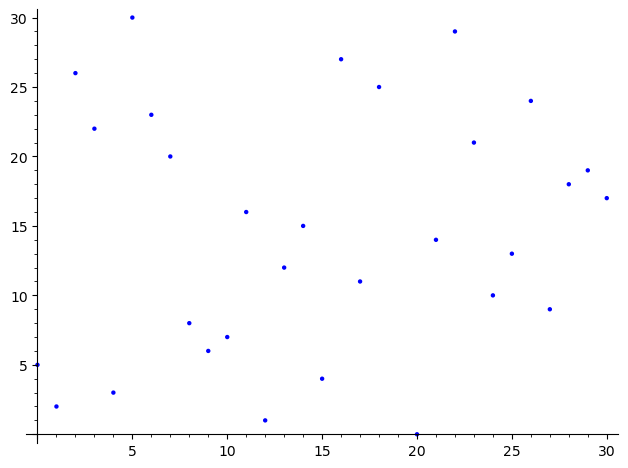

In [29]:
plot(point(pts_k))

Below I'll do all the same stuff but for a larger prime.

We take $p = 97$.  We first see that the number of "bad pairs" is not always the same.  Here we get two different values, $94$ and $97$.

In [38]:
p = 97
G = GF(p)
AG2 = AffineSpace(G,2)

for k in range(1,97):
    pts_k = []

    for x in G:
        if x!=0:
            pts_k.append((ZZ(x),ZZ(k*x^(-1))))

    count_slope1 = 0
    count_slopem1 = 0
    for p in pts_k:
        for q in pts_k:
            if p != q:
                if q[0]-p[0] == q[1]-p[1]:
                    count_slope1 = count_slope1 + 1
                if q[0]-p[0] == p[1]-q[1]:
                    count_slopem1 = count_slopem1 +1
    print(k,"\t","\t",count_slope1/2+count_slopem1/2)

1 	 	 94
2 	 	 94
3 	 	 94
4 	 	 94
5 	 	 96
6 	 	 94
7 	 	 96
8 	 	 94
9 	 	 94
10 	 	 96
11 	 	 94
12 	 	 94
13 	 	 96
14 	 	 96
15 	 	 96
16 	 	 94
17 	 	 96
18 	 	 94
19 	 	 96
20 	 	 96
21 	 	 96
22 	 	 94
23 	 	 96
24 	 	 94
25 	 	 94
26 	 	 96
27 	 	 94
28 	 	 96
29 	 	 96
30 	 	 96
31 	 	 94
32 	 	 94
33 	 	 94
34 	 	 96
35 	 	 94
36 	 	 94
37 	 	 96
38 	 	 96
39 	 	 96
40 	 	 96
41 	 	 96
42 	 	 96
43 	 	 94
44 	 	 94
45 	 	 96
46 	 	 96
47 	 	 94
48 	 	 94
49 	 	 94
50 	 	 94
51 	 	 96
52 	 	 96
53 	 	 94
54 	 	 94
55 	 	 96
56 	 	 96
57 	 	 96
58 	 	 96
59 	 	 96
60 	 	 96
61 	 	 94
62 	 	 94
63 	 	 96
64 	 	 94
65 	 	 94
66 	 	 94
67 	 	 96
68 	 	 96
69 	 	 96
70 	 	 94
71 	 	 96
72 	 	 94
73 	 	 94
74 	 	 96
75 	 	 94
76 	 	 96
77 	 	 96
78 	 	 96
79 	 	 94
80 	 	 96
81 	 	 94
82 	 	 96
83 	 	 96
84 	 	 96
85 	 	 94
86 	 	 94
87 	 	 96
88 	 	 94
89 	 	 94
90 	 	 96
91 	 	 94
92 	 	 96
93 	 	 94
94 	 	 94
95 	 	 94
96 	 	 94


Let's do the same thing where we do a bunch of random trials and see how small we can get the number of "bad pairs" to be.

In [41]:
min_bad_pairs = 100
trials = 1000
for i in range(trials):
    bad_pairs = 0
    k = randint(1,96)
    alpha = G.random_element()
    beta = G.random_element()

    pts_k = []

    for x in G:
        if x!=0:
            pts_k.append((ZZ(x+alpha),ZZ(k*x^(-1)+beta)))

    count_slope1 = 0
    count_slopem1 = 0
    for p in pts_k:
        for q in pts_k:
            if p != q:
                if q[0]-p[0] == q[1]-p[1]:
                    count_slope1 = count_slope1 + 1
                if q[0]-p[0] == p[1]-q[1]:
                    count_slopem1 = count_slopem1 +1
    bad_pairs = count_slope1/2+count_slopem1/2
    if bad_pairs < min_bad_pairs:
        print("New winner!","\t",(k,alpha,beta),"\t",bad_pairs)
        min_bad_pairs = bad_pairs

New winner! 	 (66, 10, 79) 	 65
New winner! 	 (32, 23, 35) 	 63
New winner! 	 (44, 94, 31) 	 52
New winner! 	 (42, 88, 51) 	 50
New winner! 	 (36, 4, 48) 	 46


In [43]:
min_bad_pairs = 46
trials = 1000
for i in range(trials):
    bad_pairs = 0
    k = randint(1,96)
    alpha = G.random_element()
    beta = G.random_element()

    pts_k = []

    for x in G:
        if x!=0:
            pts_k.append((ZZ(x+alpha),ZZ(k*x^(-1)+beta)))

    count_slope1 = 0
    count_slopem1 = 0
    for p in pts_k:
        for q in pts_k:
            if p != q:
                if q[0]-p[0] == q[1]-p[1]:
                    count_slope1 = count_slope1 + 1
                if q[0]-p[0] == p[1]-q[1]:
                    count_slopem1 = count_slopem1 +1
    bad_pairs = count_slope1/2+count_slopem1/2
    if bad_pairs < min_bad_pairs:
        print("New winner!","\t",(k,alpha,beta),"\t",bad_pairs)
        min_bad_pairs = bad_pairs

In [45]:
p = 331
G = GF(p)
AG2 = AffineSpace(G,2)

min_bad_pairs = 1000
trials = 1000
for i in range(trials):
    bad_pairs = 0
    k = randint(1,330)
    alpha = G.random_element()
    beta = G.random_element()

    pts_k = []

    for x in G:
        if x!=0:
            pts_k.append((ZZ(x+alpha),ZZ(k*x^(-1)+beta)))

    count_slope1 = 0
    count_slopem1 = 0
    for p in pts_k:
        for q in pts_k:
            if p != q:
                if q[0]-p[0] == q[1]-p[1]:
                    count_slope1 = count_slope1 + 1
                if q[0]-p[0] == p[1]-q[1]:
                    count_slopem1 = count_slopem1 +1
    bad_pairs = count_slope1/2+count_slopem1/2
    if bad_pairs < min_bad_pairs:
        print("New winner!","\t",(k,alpha,beta),"\t",bad_pairs)
        min_bad_pairs = bad_pairs


New winner! 	 (210, 10, 166) 	 164
